# Learning From Data HW7

Imports

In [68]:
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Validation

Load all the data

In [17]:
data_test = np.loadtxt("out.dta")
X_test, y_test = data_test[:,:-1], data_test[:,-1]

data = np.loadtxt("in.dta")
X, y = data[:,:-1], data[:,-1]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size=25, shuffle=False)

print(X_train.shape)
print(X_val.shape)

(25, 2)
(10, 2)


Define nonlinear transformations

In [44]:
phis = [
    lambda X: np.ones((X.shape[0],1)),
    lambda X: X[:,0],
    lambda X: X[:,1],
    lambda X: X[:,0]**2,
    lambda X: X[:,1]**2,
    lambda X: X[:,0]*X[:,1],
    lambda X: np.abs(X[:,0] - X[:,1]),
    lambda X: np.abs(X[:,0] + X[:,1]),
]

k = 3
Zs = lambda k: lambda X: np.column_stack([phi(X) for phi in phis[:k+1]])

# 1

For which model is the classification error on the validation set smallest?

In [61]:
for k in range(8):
    reg1 = LinearRegression(fit_intercept=False).fit(Zs(k)(X_train), y_train)
    y_val_pred = np.sign(reg1.predict(Zs(k)(X_val)))
    print("k=", k, "validation classification error:", np.mean(y_val_pred != y_val))

k= 0 validation classification error: 0.4
k= 1 validation classification error: 0.5
k= 2 validation classification error: 0.7
k= 3 validation classification error: 0.3
k= 4 validation classification error: 0.5
k= 5 validation classification error: 0.2
k= 6 validation classification error: 0.0
k= 7 validation classification error: 0.1


The classification error is smallest for k=6. **Alternative 1D**

# 2

For which model is out-of-sample classification error smallest?

In [62]:
for k in range(8):
    reg2 = LinearRegression(fit_intercept=False).fit(Zs(k)(X_train), y_train)
    y_test_pred = np.sign(reg2.predict(Zs(k)(X_test)))
    print("k=", k, "test classification error:", np.mean(y_test_pred != y_test))

k= 0 test classification error: 0.472
k= 1 test classification error: 0.488
k= 2 test classification error: 0.648
k= 3 test classification error: 0.42
k= 4 test classification error: 0.416
k= 5 test classification error: 0.188
k= 6 test classification error: 0.084
k= 7 test classification error: 0.072


The out-of-sample classification error is smallest for k=7. **Alternative 2E**

# 3

Reverse the role of the training and validation sets. For which model is the classification error on the validation set smallest?

In [63]:
# Swap validation and training data
X_train, X_val, y_train, y_val = X_val, X_train, y_val, y_train

for k in range(8):
    reg3 = LinearRegression(fit_intercept=False).fit(Zs(k)(X_train), y_train)
    y_val_pred = np.sign(reg3.predict(Zs(k)(X_val)))
    print("k=", k, "validation classification error:", np.mean(y_val_pred != y_val))

# Swap validation and training data back again
X_val, X_train, y_val, y_train = X_train, X_val, y_train, y_val

k= 0 validation classification error: 0.44
k= 1 validation classification error: 0.44
k= 2 validation classification error: 0.44
k= 3 validation classification error: 0.28
k= 4 validation classification error: 0.36
k= 5 validation classification error: 0.2
k= 6 validation classification error: 0.08
k= 7 validation classification error: 0.12


The error is smallest for k=6. **Alternative 3D**

# 4
Reverse the role of the training and validation sets. For which model is the classification error on the testing set smallest?

In [64]:
# Swap validation and training data
X_train, X_val, y_train, y_val = X_val, X_train, y_val, y_train

for k in range(8):
    reg4 = LinearRegression(fit_intercept=False).fit(Zs(k)(X_train), y_train)
    y_test_pred = np.sign(reg4.predict(Zs(k)(X_test)))
    print("k=", k, "test classification error:", np.mean(y_test_pred != y_test))

# Swap validation and training data back again
X_val, X_train, y_val, y_train = X_train, X_val, y_train, y_val

k= 0 test classification error: 0.472
k= 1 test classification error: 0.472
k= 2 test classification error: 0.5
k= 3 test classification error: 0.396
k= 4 test classification error: 0.388
k= 5 test classification error: 0.284
k= 6 test classification error: 0.192
k= 7 test classification error: 0.196


The error is lowest for k=6, **Alternative 4D**

# 5
What out-of-sample classification error did the models in Problem 1 and 3 have, respectively?

In [66]:
# Training with thes testing set
k1 = 6
reg1 = LinearRegression(fit_intercept=False).fit(Zs(k1)(X_train), y_train)
y_test_pred = np.sign(reg1.predict(Zs(k1)(X_test)))
print("k1=", k1, "test classification error:", np.mean(y_test_pred != y_test))

# Training with the validation set
k3 = 6
reg3 = LinearRegression(fit_intercept=False).fit(Zs(k3)(X_val), y_val)
y_test_pred = np.sign(reg3.predict(Zs(k3)(X_test)))
print("k3=", k3, "test classification error:", np.mean(y_test_pred != y_test))

k1= 6 test classification error: 0.084
k3= 6 test classification error: 0.192


Which is closest to **Alternative 5B**

# 6

Two uniformly distributed variables on [0, 1]. What is the expected value of the minimum of those two random variables?

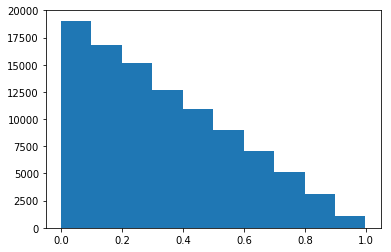

0.33409696530823246

In [87]:
es = np.random.rand(100000, 2)
e = np.min(es, axis=1)
plt.hist(e)
plt.show()
np.mean(e)

$$P(e_1 < e_2) = 0.5$$

$$ E[e_1|e_1 < x] = \frac x2 $$

$$ E[e] = P(e_1 < e_2) E[e_1|e_1<e_2] + P(e_2 < e_1) E[e_2|e_2<e_1] = 2 P(e_1 < e_2) E[e_1|e_1<e_2] $$

$$ E[e] = 2\int_{x=0}^1 P(e_1 < x) E[e_1|e_1 < x]\, dx $$

$$ E[e] = 2\int_0^1 x \cdot \frac x2 \, dx $$

$$ E[e] = \int_0^1 x^2 = \frac13 $$

Which is closest to **Alternative 6D: 0.4**

# Cross Validation

# 7

Leave-one-out cross validation for constant and linear models.

H0: b  
H1: b + ax

on the points

A: (-1 ,0)  
B: ($\rho$, 1)  
C: (1, 0)

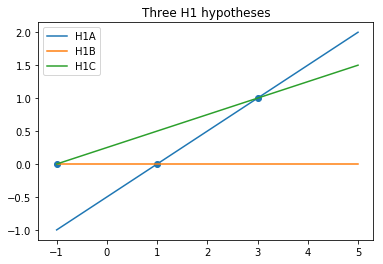

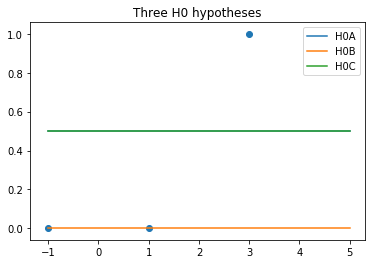

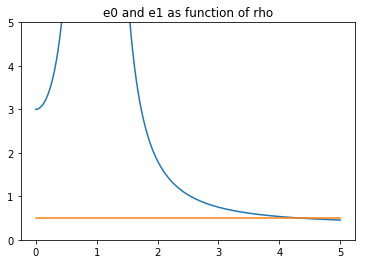

In [112]:
rho = 3

xA, yA = -1, 0
xB, yB = rho, 1
xC, yC = 1, 0

def h0A(x):
    return 1/2

def h0B(x):
    return 0

def h0C(x):
    return 1/2

def h1A(x):
    return (1-x)/(1-rho)

def h1B(x):
    return 0

def h1C(x):
    return (x+1)/(1+rho)

plt.title("Three H1 hypotheses")
plt.plot([-1, 5], [h1A(-1), h1A(5)])
plt.plot([-1, 5], [h1B(-1), h1B(5)])
plt.plot([-1, 5], [h1C(-1), h1C(5)])
plt.legend(["H1A", "H1B", "H1C"])
plt.scatter([xA, xB, xC], [yA, yB, yC])
plt.show()

plt.title("Three H0 hypotheses")
plt.plot([-1, 5], [h0A(-5), h0A(5)])
plt.plot([-1, 5], [h0B(-5), h0B(4)])
plt.plot([-1, 5], [h0C(-5), h0C(5)])
plt.legend(["H0A", "H0B", "H0C"])
plt.scatter([xA, xB, xC], [yA, yB, yC])
plt.show()

plt.title("e0 and e1 as function of rho")
rr = np.linspace(0, 5, 1000)
e0 = 1/2
e1 = 1/3 * (1 + 4/(1-rr)**2 + 4/(1+rr)**2)
plt.plot(rr, e1)
plt.plot([0, 5], [e0, e0])
plt.ylim([0, 5])
plt.show()



Solve for exact $\rho$ with SymPy

In [125]:
import sympy as sp
expr = sp.sympify("1/3 * (1 + 4/(1-r)**2 + 4/(1+r)**2) - 1/2")
sp.solve(expr, "r")

[-I*sqrt(-9 + 4*sqrt(6)),
 I*sqrt(-9 + 4*sqrt(6)),
 -sqrt(9 + 4*sqrt(6)),
 sqrt(9 + 4*sqrt(6))]

And we get $\rho = \sqrt{9 + 4\sqrt{6}}$

These are the solutions of the quartic equation $\rho^4 - 18\rho^2 - 15 = 0$. 
The only valid solution (real and positive) is the solution shown above.

In [131]:
sp.solve(sp.sympify("r**4 - 18*r**2 - 15"))

[-I*sqrt(-9 + 4*sqrt(6)),
 I*sqrt(-9 + 4*sqrt(6)),
 -sqrt(9 + 4*sqrt(6)),
 sqrt(9 + 4*sqrt(6))]

Which is **Alternative 7C**

# PLA vs. SVM

## Intermission: Solving quadratic optimization problems with cvxopt

In [132]:
import cvxopt

ModuleNotFoundError: No module named 'cvxopt'

```
!conda install -c anaconda cvxopt
```

In [135]:
import cvxopt

In [139]:
#help(cvxopt.solvers.qp)

```
Help on function qp in module cvxopt.coneprog:

qp(P, q, G=None, h=None, A=None, b=None, solver=None, kktsolver=None, initvals=None, **kwargs)
    Solves a quadratic program
    
        minimize    (1/2)*x'*P*x + q'*x
        subject to  G*x <= h
                    A*x = b.
    
    
    Input arguments.
    
        P is a n x n dense or sparse 'd' matrix with the lower triangular
        part of P stored in the lower triangle.  Must be positive
        semidefinite.
    
        q is an n x 1 dense 'd' matrix.
    
        G is an m x n dense or sparse 'd' matrix.
    
        h is an m x 1 dense 'd' matrix.
    
        A is a p x n dense or sparse 'd' matrix.
    
        b is a p x 1 dense 'd' matrix or None.
    
        solver is None or 'mosek'.
    
        The default values for G, h, A and b are empty matrices with
        zero rows.
```

**Example** (copied from https://optimization.mccormick.northwestern.edu/index.php/Quadratic_programming#Numerical_example).

Minimize $ f(x) = 3x_1^2 + x_2^2 + 2x_1 x_2 + x_1 + 6x_2 + 2 $

such that $2x_1 + 3x_2 \ge 4$ and $x_1\ge 0$ and $x_2 \ge 0$.

---

First rewrite to matrix form.

Minimize $ f(\mathbf x) = \frac12 \mathbf x^T P \mathbf x + \mathbf q^T \mathbf x $

Minimize $ f(\mathbf x) = \frac12 \mathbf x^T
\begin{bmatrix}
1.5 & 1 \\ 1 & 0.5
\end{bmatrix}
\mathbf x +
\begin{bmatrix}
1 & 6 \\
\end{bmatrix}
\mathbf x $

Subject to $G \mathbf x \le h $.

Subject to $\begin{bmatrix}
-2 & -3 \\
-1 & 0 \\
0 & -1 \\
\end{bmatrix}
\mathbf x \le \begin{bmatrix}
4 \\
0 \\
0 \\
\end{bmatrix}$.

In [277]:
%matplotlib inline
from cvxopt.solvers import qp

def f_original(x):
    return 3*x[:,0]**2 + x[:,1]**2 + 2*x[:,0]*x[:,1] + x[:,0] + 6*x[:,1] + 2

def f_matrix(x):
    P = np.array([[1.5, 1],
                  [1, 0.5]])
    q = np.array([[1], [6]])
    return 1/2 * x.T @ P @ x + q.T @ x

def constraints_satisfied(x):
    G = np.array([
        [-2, 3],
        [-1, 0],
        [0, -1],
    ])
    h = np.array([[4], [0], [0]])
    return G @ x <= h

Plot the function and constraints to get an idea.

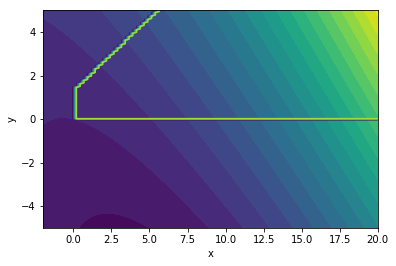

In [278]:
xx, yy = np.linspace(-2, 20, 90), np.linspace(-5, 5, 190)
XX, YY = np.meshgrid(xx, yy)
ZZ_matrix = np.zeros(XX.shape)
ZZ_original = np.zeros(XX.shape)
constraints = np.zeros(XX.shape)

for iy in range(XX.shape[0]):
    for ix in range(XX.shape[1]):
        x = np.array([[XX[iy,ix]], [YY[iy,ix]]])
        ZZ_matrix[iy,ix] = f_matrix(x)
        ZZ_original[iy,ix] = f_matrix(x)
        if np.all(constraints_satisfied(x)):
            constraints[iy,ix] = 1

plt.xlabel("x")
plt.ylabel("y")
plt.contourf(XX, YY, ZZ_matrix, 20)
plt.contour(XX, YY, constraints)

plt.show()

Looks like the minimum within the constraints is around $(0,0)$.

Now back to cvxopt again.
```
qp(P, q, G=None, h=None, A=None, b=None, solver=None, kktsolver=None, initvals=None, **kwargs)
    Solves a quadratic program

        minimize    (1/2)*x'*P*x + q'*x
        subject to  G*x <= h
                    A*x = b.
```

In [288]:
P = np.array([[1.5, 1],
              [1.0, 0.5]])

q = np.array([[1.0], 
              [6.0]])

G = np.array([
    [-2.0, 3.0],
    [-1.0, 0.0],
    [0.0, -1.0],
])
    
h = np.array([[4.0], 
              [0.0], 
              [0.0]])

qp(P, q, G, h)

ValueError: use of function valued P, G, A requires a user-provided kktsolver

 > ValueError: use of function valued P, G, A requires a user-provided kktsolver

After some googling, looks like cvxopt does not support NumPy matrices. 
We will have to do the conversion ourselves.

> TypeError: 'q' must be a 'd' matrix with one column

Also the inputs must be doubles, not integers.

In [296]:
P_cvx = cvxopt.matrix(P)
q_cvx = cvxopt.matrix(q)
G_cvx = cvxopt.matrix(G)
h_cvx = cvxopt.matrix(h)
qp_sol = qp(P_cvx, q_cvx, G_cvx, h_cvx)
print(qp_sol)
print(qp_sol["x"])
print(qp_sol["y"])

     pcost       dcost       gap    pres   dres
 0: -4.4395e-01  4.3326e+00  1e+01  1e+00  1e+00
 1: -5.8268e+00 -3.4321e+00  5e+00  5e-01  6e-01
 2:  4.7553e-01 -4.1590e-01  9e-01  7e-17  5e-15
 3:  8.2995e-03 -3.8000e-03  1e-02  4e-17  3e-16
 4:  8.3268e-05 -3.7789e-05  1e-04  2e-16  4e-17
 5:  8.3266e-07 -3.7786e-07  1e-06  3e-16  2e-16
 6:  8.3266e-09 -3.7786e-09  1e-08  1e-16  2e-16
Optimal solution found.
{'x': <2x1 matrix, tc='d'>, 'y': <0x1 matrix, tc='d'>, 's': <3x1 matrix, tc='d'>, 'z': <3x1 matrix, tc='d'>, 'status': 'optimal', 'gap': 1.2105183813130773e-08, 'relative gap': None, 'primal objective': 8.326574929943846e-09, 'dual objective': -3.778608883186781e-09, 'primal infeasibility': 1.322787507273235e-16, 'dual infeasibility': 1.6325044029792576e-16, 'primal slack': 4.1882208619692475e-10, 'dual slack': 9.446522138398042e-10, 'iterations': 6}
[ 5.81e-09]
[ 4.19e-10]




It works! Now to convert back to NumPy matrix format.

In [309]:
np.array(qp_sol["x"])

array([[5.81364238e-09],
       [4.18822086e-10]])

Nice.